# **Introduction**
Breast cancer is the most common cancer in women and the leading cause of death globally. Any advancement in cancer prediction and detection is vital to a healthy life. As a result, high accuracy in cancer prediction is critical to updating therapy and patient survival standards. 

Machine learning is a powerful approach that may help forecast and detect breast cancer early. After getting the findings, we evaluated and compared the performance of these various classifiers on the Breast Cancer Wisconsin Diagnostic dataset.

Cancer experts struggle to accurately forecast breast cancer patient survival rates. Machine learning (ML) has gained popularity in recent years, although its modeling techniques and prediction performance remain still needed to improve.

The major goal of this work is to use different machine-learning algorithms to predict and support to diagnose breast cancer in early stage, and also to determine which algorithms are the most successful in terms of accuracy, and precision.

FIGURE 1.
Demonstration of major types of Breast Cancer.
<img src="liu1-3016715-large.png" width="400" height="200">

In [6]:
# Importing Libraries:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go

In [7]:
# Reading the file
data = pd.read_csv('data.csv')

In [8]:
#data.info()
data.isnull().sum()
#* There are no null values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#data.describe()
data.shape

(569, 33)

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


* ***id*** and ***Unnamed: 32*** are not required for our model.
* There are two outcomes - **Benign Tumor** (Spreads locally and defined here in dignosis column as 'B') **Malignant Tumor** (which can spread throughout the whole body via blood and define here 'M')

In [11]:
# Dropping some of the unwanted variables:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
#One can use iloc also for subset the data also e.g. data.iloc[0:5,3]
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

**Target Variable:** The varibale whose vlaue are to be modelled and predicted by other variabele

In [12]:
#data.diagnosis.unique()
count=data['diagnosis'].value_counts()
count

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
# Binarizing the target variable:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

**Important**: The data is highly variable and any feature with low variance will be neglected. We will scale the data to allow more predictive power. <br>
** Here we are standardizing the dataset - meaning shifting the distribution to have mean of zero and standard deviation of unit variance **

In [14]:
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']

Text(0, 0.5, 'Total Number of Patients')

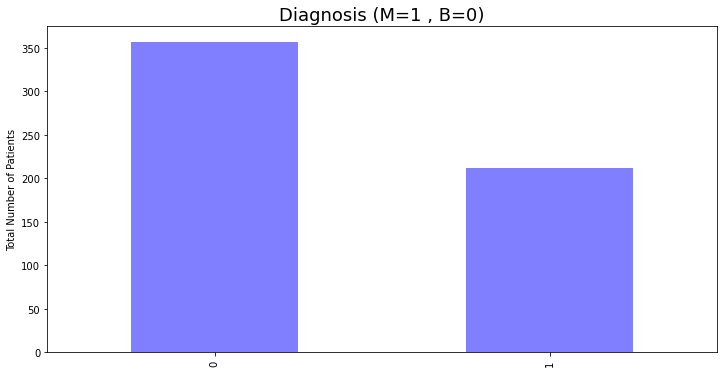

In [15]:
#Looking at the number of patients with Malignant and Benign Tumors:
datas.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize=(12,6))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")


**Plotting area of cell (mean, standard error (SE), worst)**

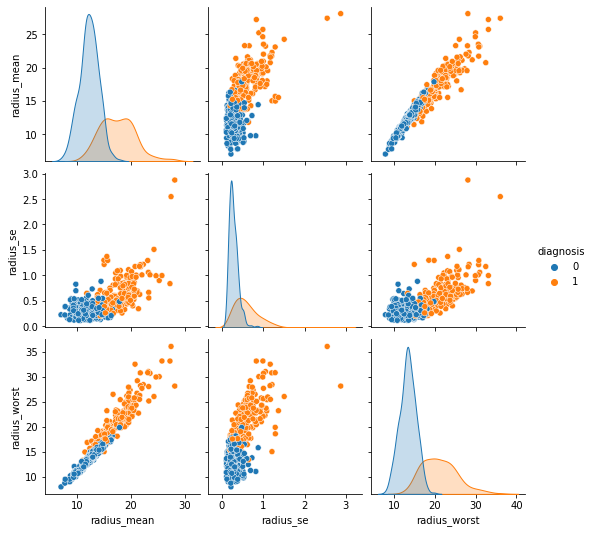

In [16]:
radius = data[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis')

**Plotting texture of Cell ( mean , standard error, worst)**

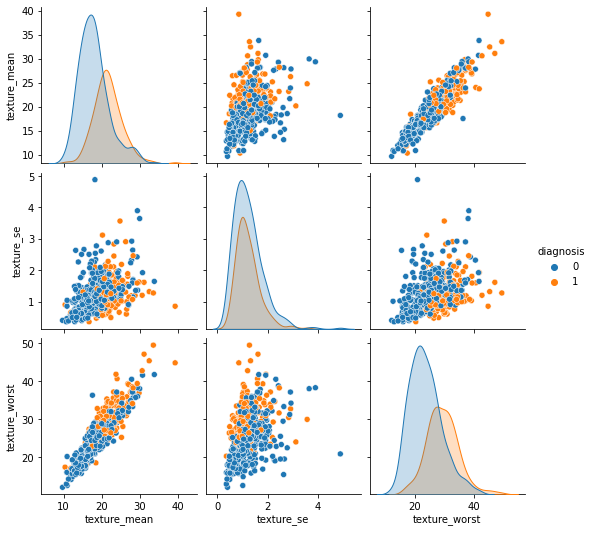

In [17]:
texture = data[['texture_mean','texture_se','texture_worst','diagnosis']]
sns.pairplot(texture, hue='diagnosis')

In [18]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
data_mean = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

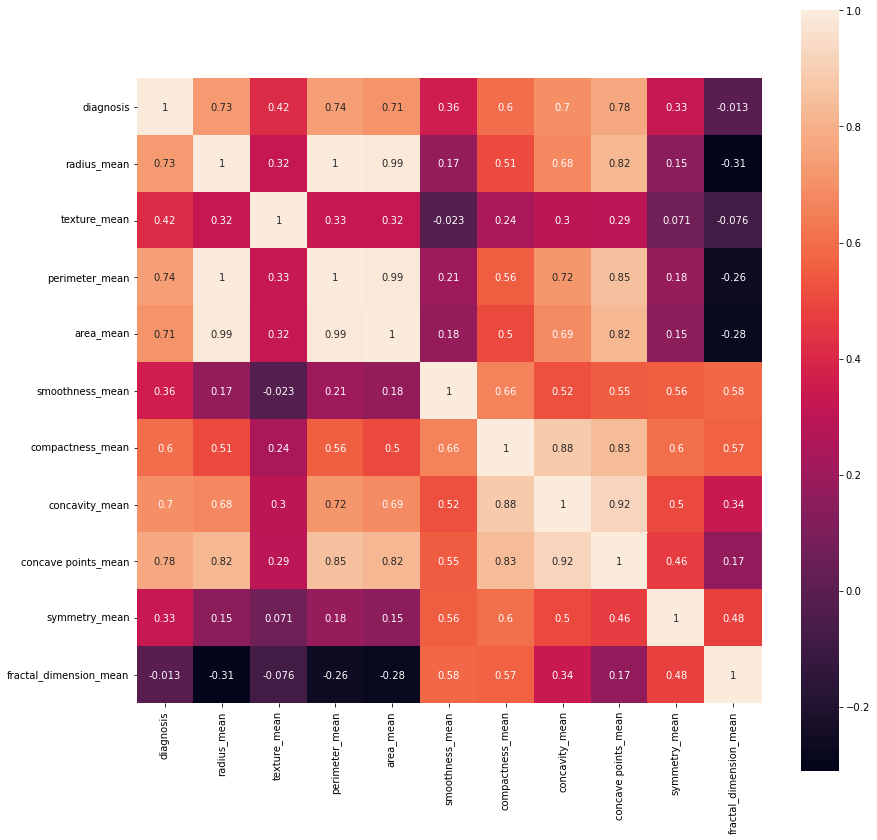

In [20]:
plt.figure(figsize=(14,14))
foo = sns.heatmap(data_mean.corr(), vmax=1, square=True, annot=True)

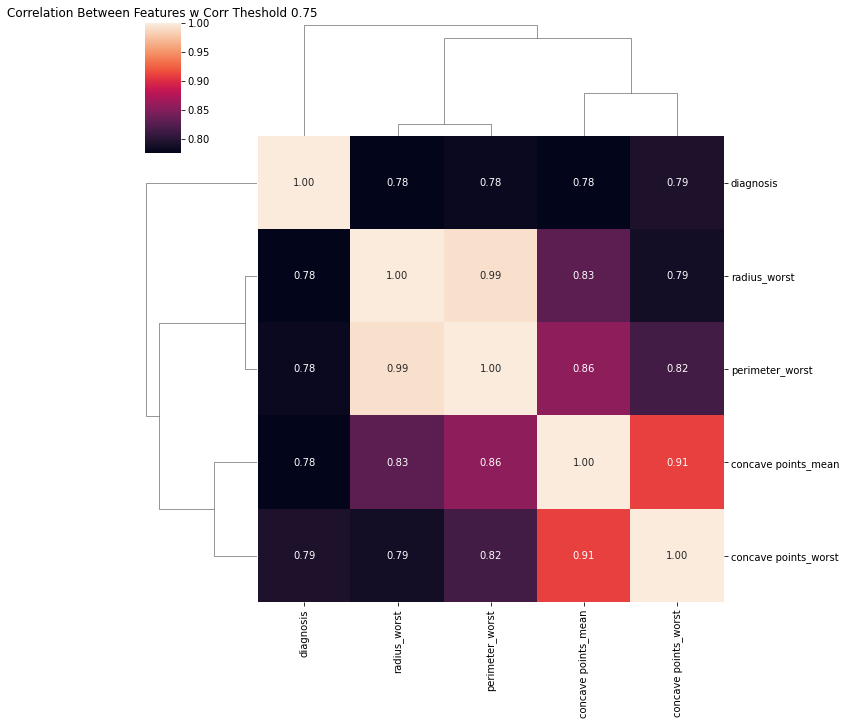

In [21]:
#lets put some threashhold for the correlation values
corr_matrix = data.corr()
threshold = 0.75 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

In [22]:
X = data.iloc[:,1:31].values
Y = data.iloc[:,0].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [24]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
#Create a function for models
def models(X_train, Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, Y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(X_train, Y_train)
    
    # KNN:
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    
    # SVM:
    from sklearn import svm
    svm = svm.SVC()
    svm=svm.fit(X_train, Y_train)
    
    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb = nb.fit(X_train, Y_train)
    
    #XGBoost:
    import xgboost as xgb
    XGB=xgb.XGBClassifier().fit(X_train, Y_train)
    

    #Print the model accuracy of training data
    print('[0]Logistic Regression Training Accuracy : ',log.score(X_train, Y_train))
    print('[1]Decision Tree Training Accuracy : ',tree.score(X_train, Y_train))
    print('[2]Random Forest Training Accuracy : ',forest.score(X_train, Y_train))
    print('[3]KNN Training Accuracy : '          ,knn.score(X_train, Y_train))
    print('[4]SVM Training Accuracy : '          ,svm.score(X_train, Y_train))
    print('[5]Naive Bayes Training Accuracy : '          ,nb.score(X_train, Y_train))
    print('[6]XGBoost Training Accuracy : '          ,XGB.score(X_train, Y_train))
    return log, tree, forest, knn, svm, nb, XGB

In [56]:
#Getting all the models
model = models(X_train, Y_train)

[08:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]Logistic Regression Training Accuracy :  0.9899497487437185
[1]Decision Tree Training Accuracy :  1.0
[2]Random Forest Training Accuracy :  1.0
[3]KNN Training Accuracy :  0.9723618090452262
[4]SVM Training Accuracy :  0.9824120603015075
[5]Naive Bayes Training Accuracy :  0.9422110552763819
[6]XGBoost Training Accuracy :  1.0


/Users/hirenghosh/miniconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [80]:
#test model accuracy on test data using confusion matrix
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    print('Model :',model[i])
    cm = confusion_matrix(Y_test,model[i].predict(X_test))

    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    print(cm)
    print('Testing Accuracy =',100*(TP + TN)/(TP + FP + FN + TN))
    print()

Model : LogisticRegression()
[[104   4]
 [  2  61]]
Testing Accuracy = 96.49122807017544

Model : DecisionTreeClassifier()
[[98 10]
 [ 6 57]]
Testing Accuracy = 90.64327485380117

Model : RandomForestClassifier()
[[105   3]
 [  2  61]]
Testing Accuracy = 97.07602339181287

Model : KNeighborsClassifier()
[[105   3]
 [  6  57]]
Testing Accuracy = 94.73684210526316

Model : SVC()
[[107   1]
 [  3  60]]
Testing Accuracy = 97.6608187134503

Model : GaussianNB()
[[99  9]
 [ 6 57]]
Testing Accuracy = 91.2280701754386

Model : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', 

In [78]:
#Another way to get matrix of the models
from sklearn.metrics import classification_report, accuracy_score
for i in range (len(model)):
    print('Model :',model[i])
    print(classification_report(Y_test,model[i].predict(X_test)))
    print(accuracy_score(Y_test,model[i].predict(X_test)))
    print()

Model : LogisticRegression()
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

0.9649122807017544

Model : DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       108
           1       0.85      0.90      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171

0.9064327485380117

Model : RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97    

In [87]:
##### test model
#test XGBoost with learning rate
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

[09:08:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hirenghosh/miniconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9590643274853801